In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
#read dataset to pandas dataframe
dataset = pd.read_csv("C:/Users/DEEPIKA/Downloads/archive (6)/IRIS.csv")
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [5]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [7]:
print(X.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [9]:
print(y.head())

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object


In [10]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: species
Non-Null Count  Dtype 
--------------  ----- 
150 non-null    object
dtypes: object(1)
memory usage: 1.3+ KB


In [11]:
dataset.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [33]:
dataset.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [35]:
data = dataset.groupby('species')

In [36]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [37]:
dataset['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 140 to 59
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  105 non-null    float64
 1   sepal_width   105 non-null    float64
 2   petal_length  105 non-null    float64
 3   petal_width   105 non-null    float64
dtypes: float64(4)
memory usage: 4.1 KB


In [14]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 98 to 115
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  45 non-null     float64
 1   sepal_width   45 non-null     float64
 2   petal_length  45 non-null     float64
 3   petal_width   45 non-null     float64
dtypes: float64(4)
memory usage: 1.8 KB


In [15]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 105 entries, 140 to 59
Series name: species
Non-Null Count  Dtype 
--------------  ----- 
105 non-null    object
dtypes: object(1)
memory usage: 1.6+ KB


In [16]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 45 entries, 98 to 115
Series name: species
Non-Null Count  Dtype 
--------------  ----- 
45 non-null     object
dtypes: object(1)
memory usage: 720.0+ bytes


In [17]:
knn = KNeighborsClassifier(n_neighbors=5)

In [18]:
classifier = knn.fit(X_train,y_train)

In [19]:
y_pred = classifier.predict(X_test)

In [20]:
import sklearn.metrics as metrics
confusion = metrics.confusion_matrix(y_true = y_test,y_pred = y_pred)
confusion

array([[12,  0,  0],
       [ 0, 14,  0],
       [ 0,  2, 17]], dtype=int64)

In [21]:
i=0
print("\n-------------------------------------------------------------------")
print('%-25s %-25s  %-25s'%('Original Label','Predicted Label','Correct/Wrong'))
print("----------------------------------------------------------------------")
for label in y_test:
    print('%-25s %-25s'%(label,y_pred[i]),end="")
    if(label == y_pred[i]):
         print('%-25s'%('Correct'))
    else:
         print('%-25s'%('Wrong'))
    i = i+1
print("-------------------------------------------------------------------------")


-------------------------------------------------------------------
Original Label            Predicted Label            Correct/Wrong            
----------------------------------------------------------------------
Iris-versicolor           Iris-versicolor          Correct                  
Iris-versicolor           Iris-versicolor          Correct                  
Iris-virginica            Iris-virginica           Correct                  
Iris-virginica            Iris-virginica           Correct                  
Iris-versicolor           Iris-versicolor          Correct                  
Iris-setosa               Iris-setosa              Correct                  
Iris-setosa               Iris-setosa              Correct                  
Iris-virginica            Iris-versicolor          Wrong                    
Iris-setosa               Iris-setosa              Correct                  
Iris-virginica            Iris-virginica           Correct                  
Iris-virgin

In [22]:
print("\nClassification Report:\n",metrics.classification_report(y_test,y_pred))
print("------------------------------------------------------------------------")


Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.88      1.00      0.93        14
 Iris-virginica       1.00      0.89      0.94        19

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

------------------------------------------------------------------------


In [23]:
print('Accuracy of the classifier is %0.2f'%metrics.accuracy_score(y_test,y_pred))
print("--------------------------------------------------------------------------")

Accuracy of the classifier is 0.96
--------------------------------------------------------------------------


In [38]:
#visualizing the dataset

{'whiskers': [<matplotlib.lines.Line2D at 0x23918585350>,
 'caps': [<matplotlib.lines.Line2D at 0x239191a1fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x239151a3890>],
 'medians': [<matplotlib.lines.Line2D at 0x239191f4d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2391920ee10>],
 'means': []}

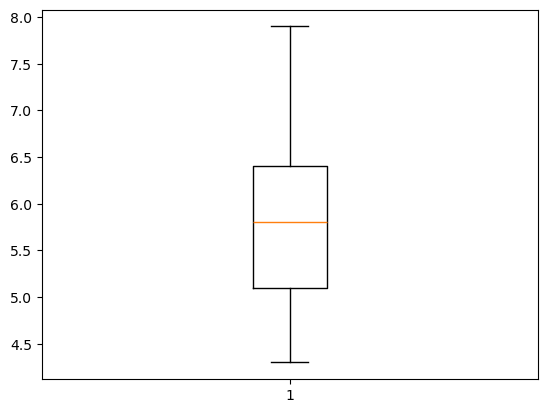

In [43]:
plt.boxplot(dataset['sepal_length'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23919303f50>,
 'caps': [<matplotlib.lines.Line2D at 0x239193113d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x239193035d0>],
 'medians': [<matplotlib.lines.Line2D at 0x23919312650>],
 'fliers': [<matplotlib.lines.Line2D at 0x23919312e10>],
 'means': []}

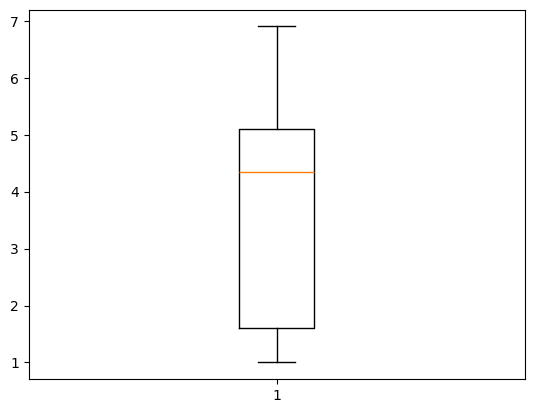

In [45]:
plt.boxplot(dataset['petal_length'])

<Axes: ylabel='species-None'>

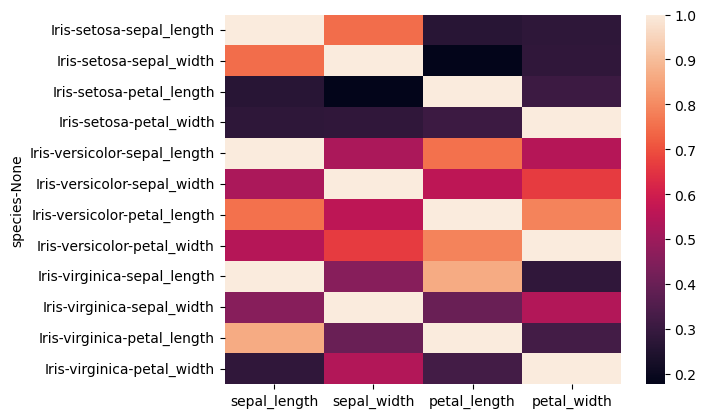

In [48]:
sns.heatmap(data.corr())